In [3]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, auc, f1_score, accuracy_score, precision_score, recall_score, roc_curve, precision_recall_curve 
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('data/model_data.csv')

X_train = pd.read_csv('data/X_train_transformed.csv')
X_test = pd.read_csv('data/X_test_transformed.csv')
y_train = pd.read_csv('data/y_train_transformed.csv')
y_test = pd.read_csv('data/y_test_transformed.csv')

#this step is necessary because we are using the already splot data inside the pycaret setup, and indexes must not overlap on the train and test data sets

#combine balanced train data back into a single df
X_train['subscribed'] = y_train
train_data = X_train

#combine test data back into a single df
X_test['subscribed'] = y_test
test_data = X_test.set_index( np.arange(len(X_train), len(X_train)+len(X_test)))

X=train_data.drop(labels=['subscribed'], axis=1)
y=train_data['subscribed']

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51190 entries, 0 to 51189
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            51190 non-null  float64
 1   job_blue-collar                51190 non-null  float64
 2   job_services                   51190 non-null  float64
 3   job_entrepreneur               51190 non-null  float64
 4   job_admin.                     51190 non-null  float64
 5   job_management                 51190 non-null  float64
 6   job_technician                 51190 non-null  float64
 7   job_housemaid                  51190 non-null  float64
 8   job_unemployed                 51190 non-null  float64
 9   job_retired                    51190 non-null  float64
 10  job_student                    51190 non-null  float64
 11  job_self-employed              51190 non-null  float64
 12  marital_married                51190 non-null 

In [4]:
from pycaret.classification import *
s = (setup( data=train_data,
            target = 'subscribed',
            test_data=test_data,
            fold=5,
            session_id = 420,
            ))

,Description,Value
0,Session id,420
1,Target,subscribed
2,Target type,Binary
3,Original data shape,"(63546, 54)"
4,Transformed data shape,"(63546, 54)"
5,Transformed train set shape,"(51190, 54)"
6,Transformed test set shape,"(12356, 54)"
7,Numeric features,53
8,Preprocess,True
9,Imputation type,simple


In [5]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=420, n_jobs=-1,n_estimators=64, max_depth=3, min_samples_split=0.1, min_samples_leaf=0.05,criterion='gini' )

rf = create_model(clf)

#tuned_rf = tune_model(rf, n_iter=5, custom_grid = parameters)
#calibrated_rf = calibrate_model(rf)
evaluate_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7294,0.7888,0.6499,0.7728,0.7061,0.4589,0.4648
1,0.7538,0.8176,0.7152,0.7750,0.7439,0.5075,0.5090
2,0.7473,0.8076,0.6949,0.7763,0.7333,0.4946,0.4974
3,0.7486,0.8145,0.6917,0.7805,0.7334,0.4972,0.5004
4,0.7479,0.8103,0.6884,0.7814,0.7320,0.4958,0.4993
Mean,0.7454,0.8078,0.6880,0.7772,0.7297,0.4908,0.4942
Std,0.0083,0.0101,0.0212,0.0033,0.0126,0.0166,0.0152


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

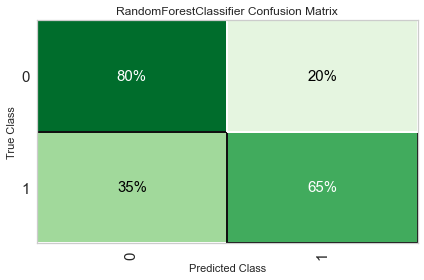

In [18]:
rf_holdout_pred = predict_model(rf, raw_score=True)

#plot_model(rf, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})
# plot_model(calibrated_rf, plot = 'calibration')

In [11]:
rf_calibrated_holdout_pred = predict_model(calibrated_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7795,0.7816,0.6586,0.2921,0.4047,0.2933,0.3299


In [7]:
pred_train = predict_model(rf,data=train_data, probability_threshold=0.5)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7459,0.8090,0.6853,0.7798,0.7295,0.4918,0.4955


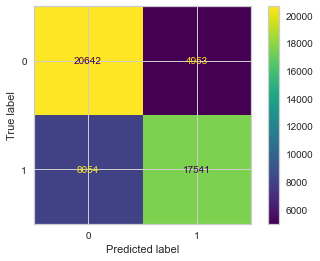

array([[20642,  4953],
       [ 8054, 17541]], dtype=int64)

In [8]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(pred_train['subscribed'], pred_train['prediction_label'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)

disp.plot()

plt.show()

cm

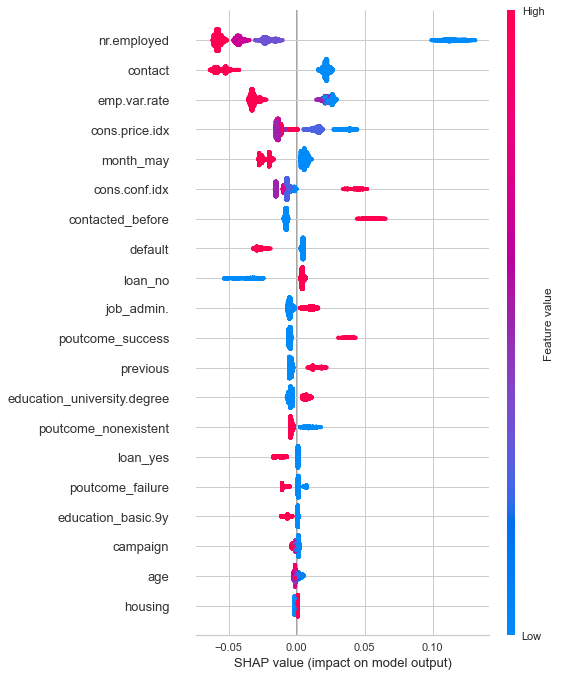

In [17]:
interpret_model(rf)

In [ ]:
interpret_model(rf, use_train_data=True)

In [16]:
rf_holdout_pred

,age,job_blue-collar,job_services,job_entrepreneur,job_admin.,job_management,job_technician,job_housemaid,job_unemployed,job_retired,...,poutcome_failure,poutcome_success,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,subscribed,prediction_label,prediction_score_0,prediction_score_1
51190,34.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.0,4.0,0.0,0,1,0.3505,0.6495
51191,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0,1,0.4410,0.5590
51192,26.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,3.0,2.0,2.0,0,0,0.7135,0.2865
51193,41.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,4.0,1.0,3.0,0,0,0.7210,0.2790
51194,52.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,2.0,3.0,3.0,0,0,0.6410,0.3590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63541,32.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,4.0,0.0,0,1,0.3199,0.6801
63542,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1,1,0.4567,0.5433
63543,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,2.0,1.0,3.0,0,0,0.6767,0.3233
63544,45.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0,1,0.4988,0.5012
